In [443]:
#Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

**Importing Dataset**

In [420]:
# Load dataset
df = pd.read_csv('train.csv')

/var/folders/qf/cw90bmqj02jdvy10h8g1kvb00000gn/T/ipykernel_15368/2786348385.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [421]:
# Display the first few rows
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [422]:
# Basic information about the dataset/ datatypes/ counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

**Statistics**

In [423]:
# Summary statistics
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [424]:
##Studying the data
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [425]:
#Dropping unecessary columns since these columns will not help in ML
columns_to_drop = ['ID','SSN', 'Customer_ID' , 'Month', 'Name', 'Type_of_Loan', 'Occupation', 'Payment_of_Min_Amount', 'Payment_Behaviour']
df = df.drop(columns_to_drop , axis=1 )

In [426]:
#Display dataframe to explore dataset after dropping columns
df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,49.574949,80.41529543900253,312.49408867943663,Good
1,23,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,49.574949,118.28022162236736,284.62916249607184,Good
2,-500,19114.12,NaN,3,4,3,4,3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,49.574949,81.699521264648,331.2098628537912,Good
3,23,19114.12,NaN,3,4,3,4,5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,49.574949,199.4580743910713,223.45130972736786,Good
4,23,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,49.574949,41.420153086217326,341.48923103222177,Good


In [427]:
# Check for missing values
df.isnull().sum()

Age                             0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Total_EMI_per_month             0
Amount_invested_monthly      4479
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [428]:
# Drop rows with missing values
df = df.dropna()

In [429]:
#Checking the datatypes
df.dtypes

Age                          object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Monthly_Balance              object
Credit_Score                 object
dtype: object

**Diving Data into 2 sections##**
##

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66548 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       66548 non-null  object 
 1   Annual_Income             66548 non-null  object 
 2   Monthly_Inhand_Salary     66548 non-null  float64
 3   Num_Bank_Accounts         66548 non-null  int64  
 4   Num_Credit_Card           66548 non-null  int64  
 5   Interest_Rate             66548 non-null  int64  
 6   Num_of_Loan               66548 non-null  object 
 7   Delay_from_due_date       66548 non-null  int64  
 8   Num_of_Delayed_Payment    66548 non-null  object 
 9   Changed_Credit_Limit      66548 non-null  object 
 10  Num_Credit_Inquiries      66548 non-null  float64
 11  Credit_Mix                66548 non-null  object 
 12  Outstanding_Debt          66548 non-null  object 
 13  Credit_Utilization_Ratio  66548 non-null  float64
 14  Credit_Hist

**Changing Datatypes to Int or Float**

In [431]:
# Remove underscore / non-numeric characters from the values in the column
# Convert the columns to integer or float


df['Credit_Mix'] = df['Credit_Mix'].replace('_')

df['Age'] = df['Age'].replace('_', '')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce', downcast='integer')

df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].abs()

df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df['Num_of_Loan'] = df['Num_of_Loan'].abs()

df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].abs()

df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace("_", "")
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

df['Num_of_Loan'] = df['Num_of_Loan'].replace('_', '')
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce', downcast='integer')

df['Annual_Income'] = df['Annual_Income'].astype(str)
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '')
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce', downcast='integer')

df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce', downcast='integer')
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')


/var/folders/qf/cw90bmqj02jdvy10h8g1kvb00000gn/T/ipykernel_15368/1249478526.py:5: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df['Credit_Mix'] = df['Credit_Mix'].replace('_')


In [432]:
#Converting Credit_History_Age into integer value in months

def convert_to_months(value):
    if pd.isnull(value):
        return np.nan

    if isinstance(value, str):
        parts = value.split()
        years = int(parts[0])
        months = int(parts[3])
    
        total_months = years * 12 + months
        return total_months
    else:
        return np.nan  
    
df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_months)

df['Credit_History_Age'] 

0        265
6        271
8        319
9        320
10       321
        ... 
99994    377
99995    378
99996    379
99997    380
99999    382
Name: Credit_History_Age, Length: 66548, dtype: int64

In [436]:
##Handling Non-numeric columns
Catergorical_columns = ['Credit_Mix', 'Credit_Score']

In [447]:
df[Catergorical_columns]

,Credit_Mix,Credit_Score
0,3,0
6,1,0
8,1,2
9,1,0
10,1,2
...,...,...
99994,0,1
99995,0,1
99996,0,1
99997,1,1


In [444]:
#Encoding 'Credit_Score' column
le = LabelEncoder()

df['Credit_Score'] = le.fit_transform(df['Credit_Score'])

le.classes_

array([0, 1, 2])

In [445]:
#Encoding data
df['Credit_Mix'] = le.fit_transform(df['Credit_Mix'])

le.classes_

array([0, 1, 2, 3])

In [448]:
#Displaying encodeed columns
df[Catergorical_columns]

,Credit_Mix,Credit_Score
0,3,0
6,1,0
8,1,2
9,1,0
10,1,2
...,...,...
99994,0,1
99995,0,1
99996,0,1
99997,1,1


In [467]:
df = df.dropna()

In [468]:
#Displaying dataframe converted into numerical
df.head(25)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,3,809.98,26.822620,265,49.574949,80.415295,312.494089,0
9,28.0,34847.84,3037.986667,2,4,6,1.0,7,1.0,7.42,2.0,1,605.03,38.550848,320,18.816215,40.391238,484.591214,0
10,28.0,34847.84,3037.986667,2,1385,6,1.0,3,1.0,5.42,2.0,1,605.03,33.224951,321,18.816215,58.515976,466.466476,2
12,28.0,34847.84,3037.986667,2,4,6,1.0,3,1.0,6.42,2.0,1,605.03,34.977895,323,18.816215,130.115420,444.867032,0
13,28.0,34847.84,3037.986667,2,4,6,1.0,3,0.0,5.42,2.0,1,605.03,33.381010,324,18.816215,43.477190,481.505262,0
15,28.0,34847.84,3037.986667,2,4,6,1.0,3,4.0,5.42,2.0,1,605.03,32.933856,326,18.816215,218.904344,356.078109,0
24,54.0,30689.89,2612.490833,2,5,4,1.0,0,6.0,1.99,4.0,1,632.46,26.544229,207,16.415452,81.228859,433.604773,2
25,54.0,30689.89,2612.490833,2,5,4,1.0,5,3.0,1.99,4.0,1,632.46,35.279982,208,16.415452,124.881820,409.951812,2
26,55.0,30689.89,2612.490833,2,5,4,1.0,3,9.0,1.99,4.0,1,632.46,32.301163,209,16.415452,83.406509,411.427123,2
27,55.0,30689.89,2612.490833,2,5,4,1.0,7,6.0,2.01,4.0,1,632.46,38.132348,210,16.415452,272.334037,262.499594,2


In [469]:
# Removing Outliers
# Calculate Q1, Q3, and IQR for each numeric column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers from the DataFrame
df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [470]:
df_no_outliers

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,3,809.98,26.822620,265,49.574949,80.415295,312.494089,0
9,28.0,34847.84,3037.986667,2,4,6,1.0,7,1.0,7.42,2.0,1,605.03,38.550848,320,18.816215,40.391238,484.591214,0
12,28.0,34847.84,3037.986667,2,4,6,1.0,3,1.0,6.42,2.0,1,605.03,34.977895,323,18.816215,130.115420,444.867032,0
13,28.0,34847.84,3037.986667,2,4,6,1.0,3,0.0,5.42,2.0,1,605.03,33.381010,324,18.816215,43.477190,481.505262,0
15,28.0,34847.84,3037.986667,2,4,6,1.0,3,4.0,5.42,2.0,1,605.03,32.933856,326,18.816215,218.904344,356.078109,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99983,50.0,37188.10,3097.008333,1,4,5,3.0,7,9.0,5.38,3.0,1,620.64,39.300980,364,84.205949,42.935566,432.559318,0
99994,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,9.50,3.0,0,502.38,39.323569,377,35.104023,140.581403,410.256158,1
99995,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.0,11.50,3.0,0,502.38,34.663572,378,35.104023,60.971333,479.866228,1
99996,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.0,11.50,3.0,0,502.38,40.565631,379,35.104023,54.185950,496.651610,1


In [471]:
# Drop null values from cleaned dataset
df_no_outliers = df_no_outliers.dropna()

In [450]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33467 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       33467 non-null  float64
 1   Annual_Income             33467 non-null  float64
 2   Monthly_Inhand_Salary     33467 non-null  float64
 3   Num_Bank_Accounts         33467 non-null  int64  
 4   Num_Credit_Card           33467 non-null  int64  
 5   Interest_Rate             33467 non-null  int64  
 6   Num_of_Loan               33467 non-null  float64
 7   Delay_from_due_date       33467 non-null  int64  
 8   Num_of_Delayed_Payment    33467 non-null  float64
 9   Changed_Credit_Limit      33467 non-null  float64
 10  Num_Credit_Inquiries      33467 non-null  float64
 11  Credit_Mix                33467 non-null  int64  
 12  Outstanding_Debt          33467 non-null  float64
 13  Credit_Utilization_Ratio  33467 non-null  float64
 14  Credit_Hist

In [451]:
# Displaying clean dataset without outliers
df_no_outliers.head(5)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,3,809.98,26.822620,265,49.574949,80.415295,312.494089,0
9,28.0,34847.84,3037.986667,2,4,6,1.0,7,1.0,7.42,2.0,1,605.03,38.550848,320,18.816215,40.391238,484.591214,0
12,28.0,34847.84,3037.986667,2,4,6,1.0,3,1.0,6.42,2.0,1,605.03,34.977895,323,18.816215,130.115420,444.867032,0
13,28.0,34847.84,3037.986667,2,4,6,1.0,3,0.0,5.42,2.0,1,605.03,33.381010,324,18.816215,43.477190,481.505262,0
15,28.0,34847.84,3037.986667,2,4,6,1.0,3,4.0,5.42,2.0,1,605.03,32.933856,326,18.816215,218.904344,356.078109,0


In [466]:
df_no_outliers.to_csv('df_no_outliers.csv', index=False)

In [472]:

# numeric_df = df.select_dtypes(include=['float64', 'int64'])
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR= Q3-Q1
print(df< (Q1 - 1.5* IQR)| (df > (Q3 + 1.5*IQR)))


         Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      False          False                  False              False   
9      False          False                  False              False   
10     False          False                  False              False   
12     False          False                  False              False   
13     False          False                  False              False   
...      ...            ...                    ...                ...   
99994  False          False                  False              False   
99995  False          False                  False              False   
99996  False          False                  False              False   
99997  False          False                  False              False   
99999  False          False                  False              False   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                False          False        Fal

In [473]:
# filter out outliers from DataFrame based on the IQR (Interquartile Range) method for specific columns
s = set([
    'Age',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Num_Credit_Inquiries'
])


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for column in df.columns:
    if column in s:
        continue
    df = df[(df[column] >= lower_bound[column]) & (df[column] <= upper_bound[column])]

print(df)


        Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      23.0       19114.12            1824.843333                  3   
9      28.0       34847.84            3037.986667                  2   
10     28.0       34847.84            3037.986667                  2   
12     28.0       34847.84            3037.986667                  2   
13     28.0       34847.84            3037.986667                  2   
...     ...            ...                    ...                ...   
99994  25.0       39628.99            3359.415833                  4   
99995  25.0       39628.99            3359.415833                  4   
99996  25.0       39628.99            3359.415833                  4   
99997  25.0       39628.99            3359.415833                  4   
99999  25.0       39628.99            3359.415833                  4   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                    4              3          4.0          

In [474]:
df_no_outliers

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,3,809.98,26.822620,265,49.574949,80.415295,312.494089,0
9,28.0,34847.84,3037.986667,2,4,6,1.0,7,1.0,7.42,2.0,1,605.03,38.550848,320,18.816215,40.391238,484.591214,0
12,28.0,34847.84,3037.986667,2,4,6,1.0,3,1.0,6.42,2.0,1,605.03,34.977895,323,18.816215,130.115420,444.867032,0
13,28.0,34847.84,3037.986667,2,4,6,1.0,3,0.0,5.42,2.0,1,605.03,33.381010,324,18.816215,43.477190,481.505262,0
15,28.0,34847.84,3037.986667,2,4,6,1.0,3,4.0,5.42,2.0,1,605.03,32.933856,326,18.816215,218.904344,356.078109,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99983,50.0,37188.10,3097.008333,1,4,5,3.0,7,9.0,5.38,3.0,1,620.64,39.300980,364,84.205949,42.935566,432.559318,0
99994,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,9.50,3.0,0,502.38,39.323569,377,35.104023,140.581403,410.256158,1
99995,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.0,11.50,3.0,0,502.38,34.663572,378,35.104023,60.971333,479.866228,1
99996,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.0,11.50,3.0,0,502.38,40.565631,379,35.104023,54.185950,496.651610,1


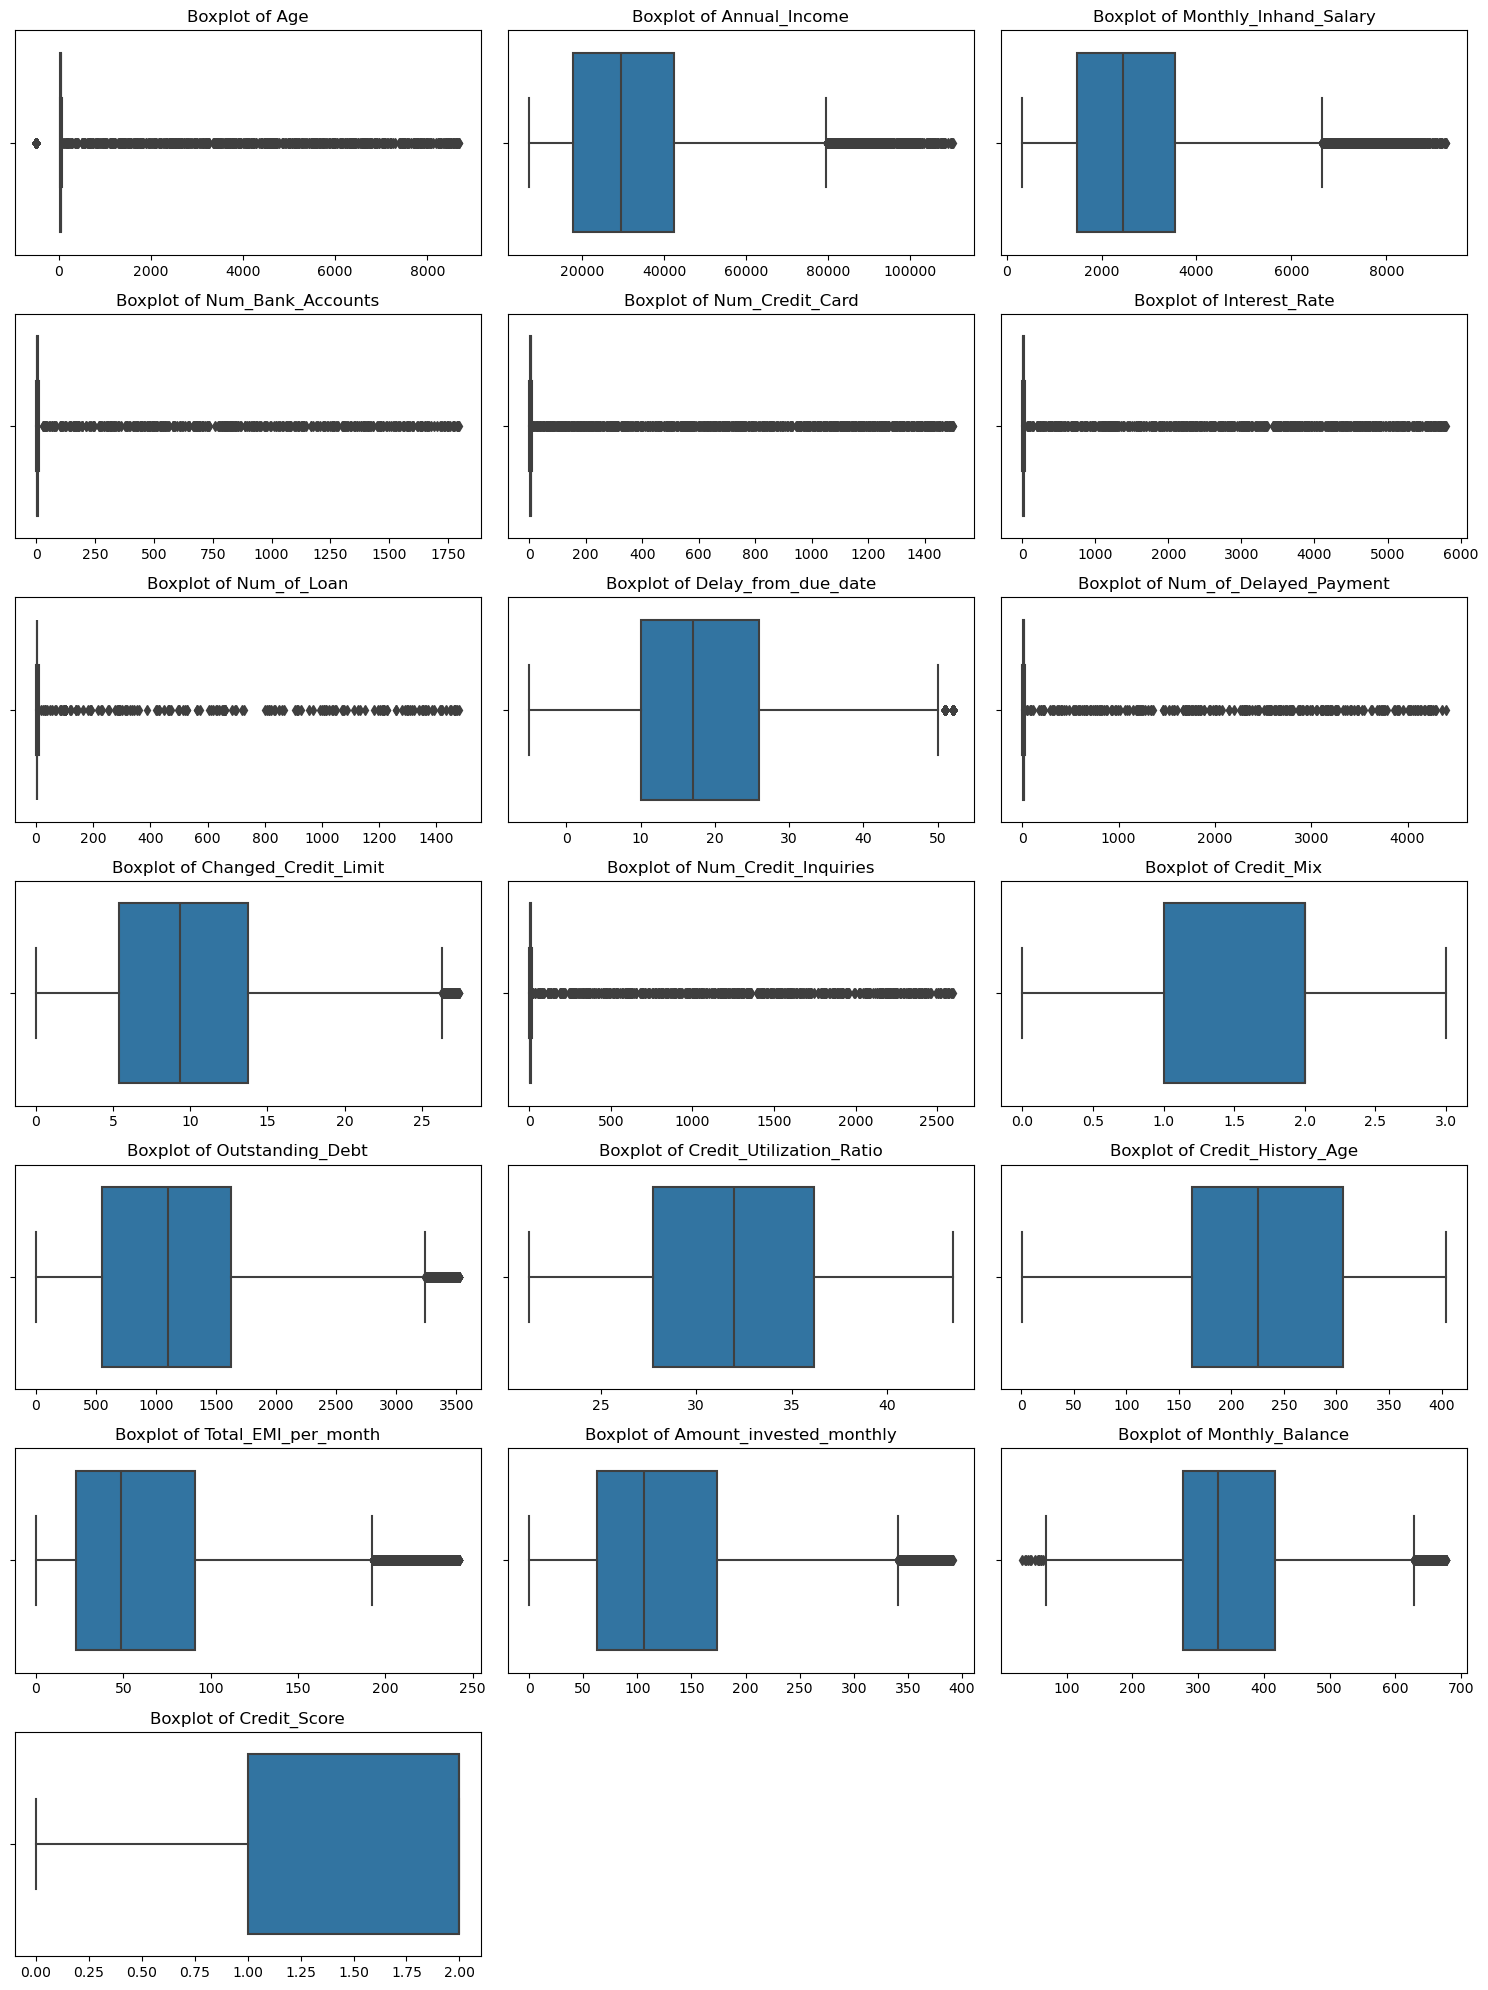

In [475]:
# create a grid of boxplots for each feature in DataFrame
num_cols = 3

num_features = len(df.columns)
num_rows = (num_features - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flattenning the axes
axes = axes.ravel()

i = -1

for feature in df.columns:
    
    i += 1
    ax = axes[i]
    sns.boxplot(x=df[feature], ax = ax)
    ax.set_title(f'Boxplot of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')

    
for i in range(num_features, num_cols * num_rows):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

In [476]:
# Resetting Index
df.reset_index(drop=True)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,3,809.98,26.822620,265,49.574949,80.415295,312.494089,0
1,28.0,34847.84,3037.986667,2,4,6,1.0,7,1.0,7.42,2.0,1,605.03,38.550848,320,18.816215,40.391238,484.591214,0
2,28.0,34847.84,3037.986667,2,1385,6,1.0,3,1.0,5.42,2.0,1,605.03,33.224951,321,18.816215,58.515976,466.466476,2
3,28.0,34847.84,3037.986667,2,4,6,1.0,3,1.0,6.42,2.0,1,605.03,34.977895,323,18.816215,130.115420,444.867032,0
4,28.0,34847.84,3037.986667,2,4,6,1.0,3,0.0,5.42,2.0,1,605.03,33.381010,324,18.816215,43.477190,481.505262,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32504,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,9.50,3.0,0,502.38,39.323569,377,35.104023,140.581403,410.256158,1
32505,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.0,11.50,3.0,0,502.38,34.663572,378,35.104023,60.971333,479.866228,1
32506,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.0,11.50,3.0,0,502.38,40.565631,379,35.104023,54.185950,496.651610,1
32507,25.0,39628.99,3359.415833,4,6,5729,2.0,27,6.0,11.50,3.0,1,502.38,41.255522,380,35.104023,24.028477,516.809083,1


Text(0.5, 1.0, 'Boxplots for Multiple Columns')

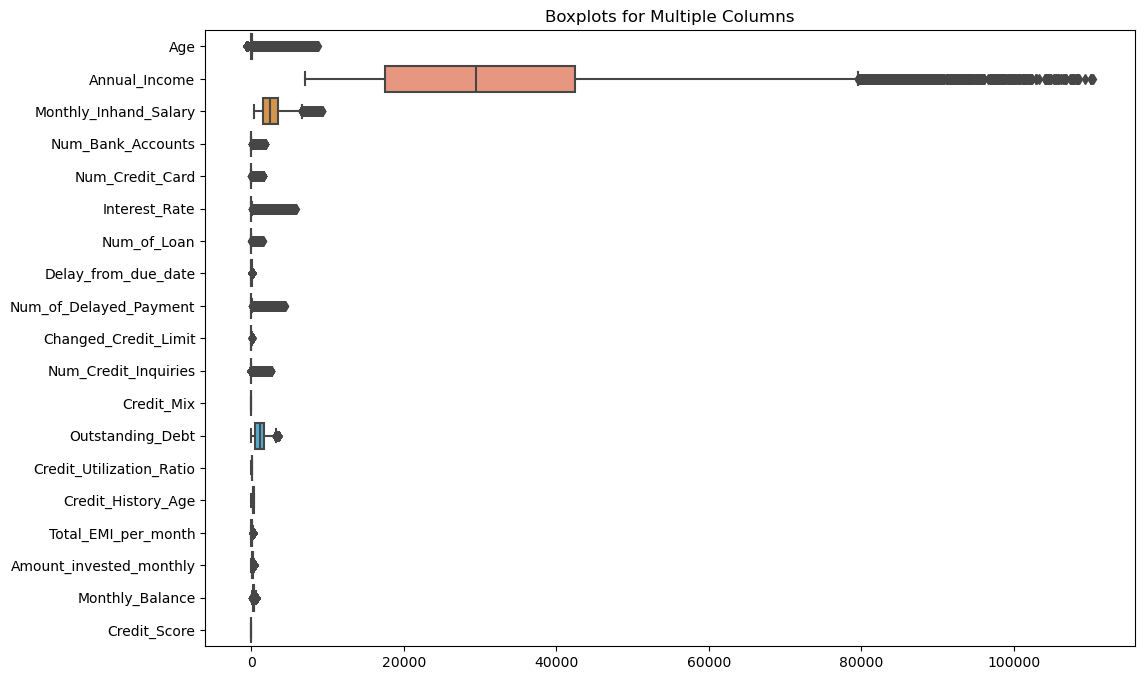

In [477]:
# Use Seaborn to create boxplots for all columns in df
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')  
plt.title('Boxplots for Multiple Columns')

Text(0.5, 1.0, 'Boxplots for Multiple Columns')

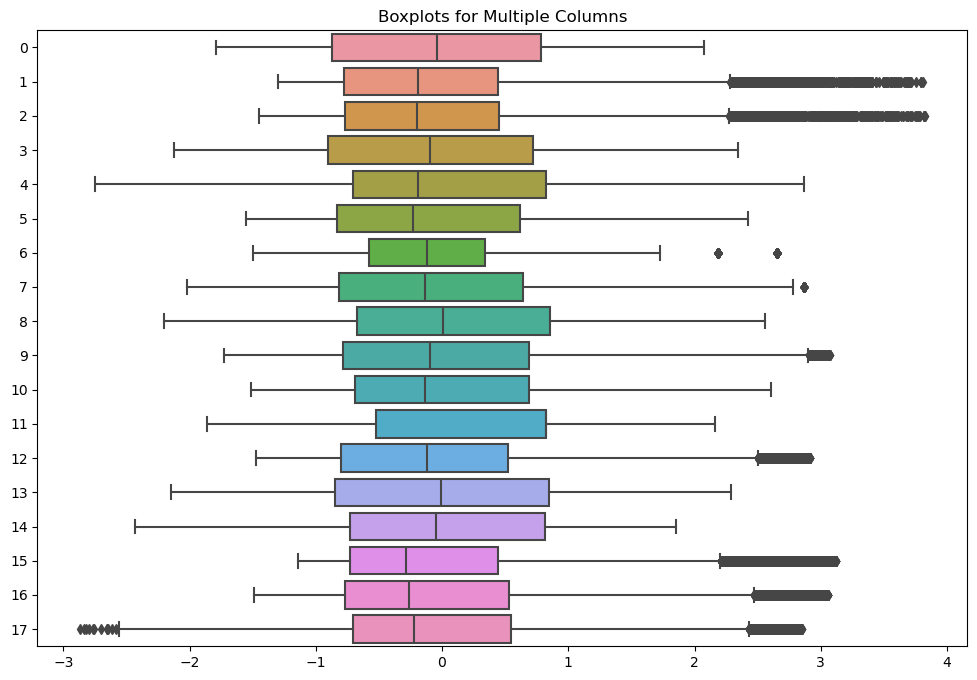

In [478]:
# Use Seaborn to create boxplots for all columns in df
sc = StandardScaler()
sc.fit(df_no_outliers.drop('Credit_Score', axis = 1))
data_without_outliers = sc.transform(df_no_outliers.drop('Credit_Score', axis = 1))
data__without_outliers = pd.DataFrame(data_without_outliers, columns = df_no_outliers.drop('Credit_Score', axis = 1).columns)

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Use Seaborn to create boxplots for all columns in df
sns.boxplot(data=data_without_outliers, orient='h')  # orient='h' for horizontal boxplots
plt.title('Boxplots for Multiple Columns')

Text(0.5, 1.0, 'Boxplots for Multiple Columns')

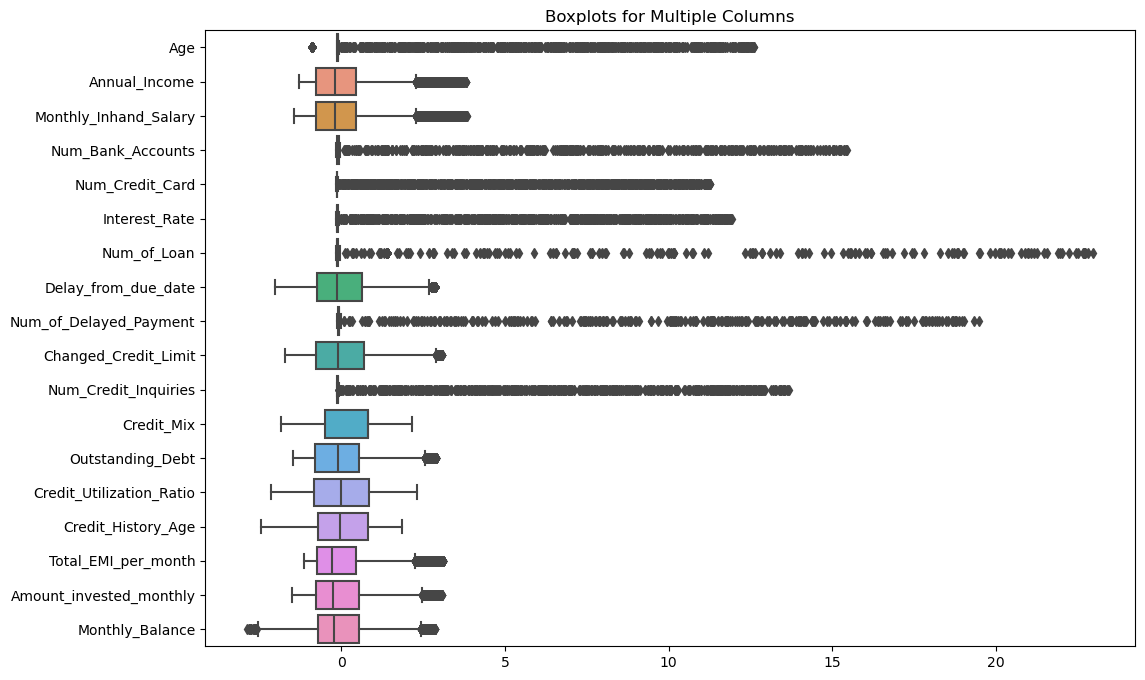

In [479]:
# Use Seaborn to create boxplots for all columns in df
sc = StandardScaler()
sc.fit(df.drop('Credit_Score', axis = 1))
data_with_outliers = sc.transform(df.drop('Credit_Score', axis = 1))
data_with_outliers = pd.DataFrame(data_with_outliers, columns = df.drop('Credit_Score', axis = 1).columns)

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Use Seaborn to create boxplots for all columns in df
sns.boxplot(data=data_with_outliers, orient='h')  # orient='h' for horizontal boxplots
plt.title('Boxplots for Multiple Columns')

In [481]:
##Drop null Values
df = df.dropna()
df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,3,809.98,26.822620,265,49.574949,80.415295,312.494089,0
9,28.0,34847.84,3037.986667,2,4,6,1.0,7,1.0,7.42,2.0,1,605.03,38.550848,320,18.816215,40.391238,484.591214,0
10,28.0,34847.84,3037.986667,2,1385,6,1.0,3,1.0,5.42,2.0,1,605.03,33.224951,321,18.816215,58.515976,466.466476,2
12,28.0,34847.84,3037.986667,2,4,6,1.0,3,1.0,6.42,2.0,1,605.03,34.977895,323,18.816215,130.115420,444.867032,0
13,28.0,34847.84,3037.986667,2,4,6,1.0,3,0.0,5.42,2.0,1,605.03,33.381010,324,18.816215,43.477190,481.505262,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,9.50,3.0,0,502.38,39.323569,377,35.104023,140.581403,410.256158,1
99995,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.0,11.50,3.0,0,502.38,34.663572,378,35.104023,60.971333,479.866228,1
99996,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.0,11.50,3.0,0,502.38,40.565631,379,35.104023,54.185950,496.651610,1
99997,25.0,39628.99,3359.415833,4,6,5729,2.0,27,6.0,11.50,3.0,1,502.38,41.255522,380,35.104023,24.028477,516.809083,1


In [483]:
#Save csv
df.to_csv('df.csv', index=False)